## AIR TRANSPORT 
### Flight Delays

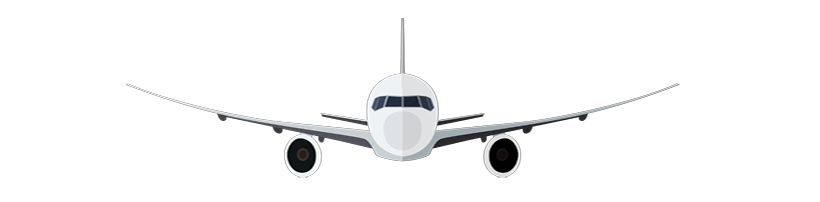

This analysis provides information about airline on-time performance, flight delays, and cancellations.  It is based on data filed by airlines each month with the Department of Transportation’s Bureau of Transportation Statistics.  It covers nonstop operated and marketed scheduled-service flights between points within area by the fifteen (15) U.S. air carriers that have at least half of one percent of total domestic scheduled-service passenger revenues. 

## 1) Loading data

*The file contains information about delayed flights, this file is organized in 21 columns.
* Some observations are detailed:
* year,month: year and month of the record.
* Airlines: carrier, carrier_name: Code and name of the towel.
* Airports: airport, airport_name: Code and name of the airport.
* Flight metrics: arr_flights: Total number of arriving flights.
arr_del15: Total number of flights delayed by more than 15 minutes.
* Causes of the delay:
Carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct: count of delays by aircraft, weather, national system, security and delays by other aircraft.

Carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay: Total duration of delays for each cause.

* Others: arr_cancelled, arr_diverted: Cancelled and diverted flights.
arr_delay: Total accumulated delay minutes.

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('Airline_Delay_Cause.csv')

## 2) Data exploration

In [4]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


In [5]:
data.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1883,2024,8,ZW,Air Wisconsin Airlines Corp,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",62.0,11.0,2.51,1.10,...,0.0,5.35,0.0,1.0,549.0,71.0,76.0,58.0,0.0,344.0
1884,2024,8,ZW,Air Wisconsin Airlines Corp,SGF,"Springfield, MO: Springfield-Branson National",5.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,37.0,0.0,0.0,0.0,0.0,37.0
1885,2024,8,ZW,Air Wisconsin Airlines Corp,SPI,"Springfield, IL: Abraham Lincoln Capital",58.0,11.0,3.87,0.00,...,0.0,5.94,0.0,0.0,756.0,351.0,0.0,37.0,0.0,368.0
1886,2024,8,ZW,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI: Cherry Capital",80.0,16.0,7.38,0.90,...,0.0,4.11,0.0,0.0,988.0,334.0,146.0,180.0,0.0,328.0
1887,2024,8,ZW,Air Wisconsin Airlines Corp,TYS,"Knoxville, TN: McGhee Tyson",29.0,4.0,1.71,0.13,...,0.0,0.87,0.0,1.0,218.0,115.0,8.0,42.0,0.0,53.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1888 non-null   int64  
 1   month                1888 non-null   int64  
 2   carrier              1888 non-null   object 
 3   carrier_name         1888 non-null   object 
 4   airport              1888 non-null   object 
 5   airport_name         1888 non-null   object 
 6   arr_flights          1888 non-null   float64
 7   arr_del15            1888 non-null   float64
 8   carrier_ct           1888 non-null   float64
 9   weather_ct           1888 non-null   float64
 10  nas_ct               1888 non-null   float64
 11  security_ct          1888 non-null   float64
 12  late_aircraft_ct     1888 non-null   float64
 13  arr_cancelled        1888 non-null   float64
 14  arr_diverted         1888 non-null   float64
 15  arr_delay            1888 non-null   f

In [7]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1888.0,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,2024.0,8.0,349.914725,79.454449,24.618713,3.256133,21.761801,0.175789,29.642034,7.115466,1.151483,5981.165254,1997.205508,364.050847,1207.162606,7.843220,2404.903072
std,0.0,0.0,1011.265707,214.504368,60.667339,9.722118,63.514019,0.786781,89.909016,24.456778,4.303699,18064.577899,6213.861743,1121.704027,3752.745585,36.641589,8055.442371
min,2024.0,8.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,8.0,49.000000,9.000000,3.000000,0.000000,1.727500,0.000000,1.997500,0.000000,0.000000,551.500000,168.000000,0.000000,64.000000,0.000000,126.250000
50%,2024.0,8.0,93.000000,22.000000,7.650000,0.910000,5.085000,0.000000,7.230000,1.000000,0.000000,1464.000000,492.500000,51.000000,217.000000,0.000000,516.500000
75%,2024.0,8.0,241.000000,57.000000,20.645000,2.640000,13.755000,0.000000,20.712500,5.000000,1.000000,4019.000000,1459.000000,265.250000,657.500000,0.000000,1686.500000
max,2024.0,8.0,20190.000000,3519.000000,1033.960000,160.860000,815.810000,13.910000,1815.820000,396.000000,74.000000,357076.000000,122038.000000,17207.000000,53708.000000,588.000000,197739.000000


## Exploratory analysis of the causes of delay.

1) With this information from the dataset we can see how many flights were delayed for each reason. (mean) will tell us the average number of delayed flights.

* Carrier_ct: 24,618 flights.
* weather_ct :3.256
* nas_ct: 21,761
* security_ct: 0.175
* late_aircraft_ct: 29.642034

In this point it's possible to see that the largest number of delayed flights belongs to late_aircraft_ct: delays due to previous aircraft.

2) Delays in minutes. Overall averages:

* Carrier_delay: 1997.2 min
* weather_delay: 364.05 min
* nas_delay: 1207.16 min
* security_delay: 7.84 min
* late_aircraft_delay : 2404.90

It can be seen that the longest delays in minutes correspond to late_aircraft_delay: delays by previous airlines with a maximum of 197,739 minutes

In [8]:
delay_causes = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]
delay_durations = data[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]



In [9]:
summary_causes = delay_causes.describe()
summary_durations = delay_durations.describe()


In [10]:
summary_causes, summary_durations

(        carrier_ct   weather_ct       nas_ct  security_ct  late_aircraft_ct
 count  1888.000000  1888.000000  1888.000000  1888.000000       1888.000000
 mean     24.618713     3.256133    21.761801     0.175789         29.642034
 std      60.667339     9.722118    63.514019     0.786781         89.909016
 min       0.000000     0.000000     0.000000     0.000000          0.000000
 25%       3.000000     0.000000     1.727500     0.000000          1.997500
 50%       7.650000     0.910000     5.085000     0.000000          7.230000
 75%      20.645000     2.640000    13.755000     0.000000         20.712500
 max    1033.960000   160.860000   815.810000    13.910000       1815.820000,
        carrier_delay  weather_delay     nas_delay  security_delay  \
 count    1888.000000    1888.000000   1888.000000     1888.000000   
 mean     1997.205508     364.050847   1207.162606        7.843220   
 std      6213.861743    1121.704027   3752.745585       36.641589   
 min         0.000000     

## Exploratory Data Analysis  

### EDA Will help analyse the data appropriately, avoiding assumptions, identifying errors, and visualizing the data
* The graph shows delays by cause.
* It can be observed that delays due to previous aircraft are the most frequent, followed by nas_ct and carrier_ct airlines.
* Among the less frequent causes are weather and security.

In [20]:
import matplotlib.pyplot as plt 


In [22]:
total_causes = delay_causes.sum()
total_durations= delay_durations.sum()

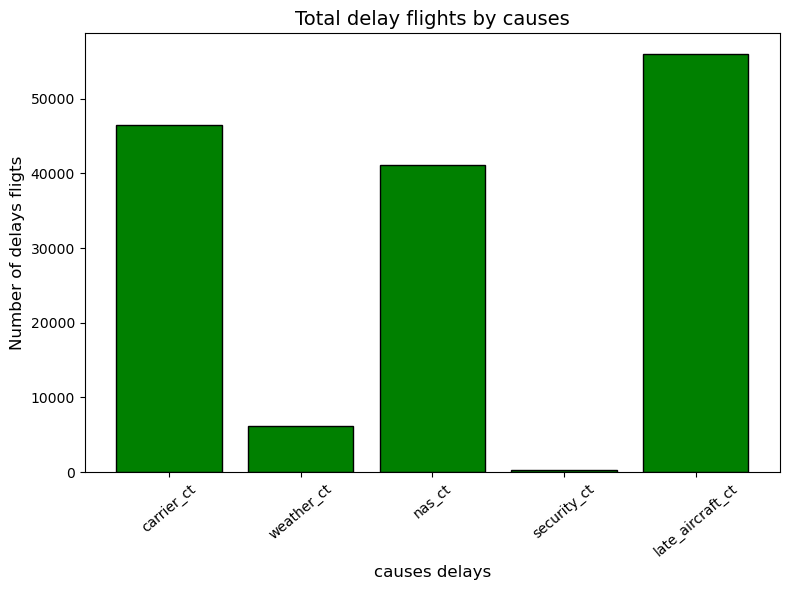

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(total_causes.index,total_causes.values, color='green', edgecolor='black')
plt.title('Total delay flights by causes', fontsize=14)
plt.xlabel('causes delays', fontsize=12)
plt.ylabel('Number of delays fligts', fontsize=12)
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

## Data processing

We want to know if a flight will be delayed by more than 15 minutes, so we are going to use (arr_del15) as the target variable.
We are going to convert the categorical variables (airline and airport) into numerical variables, for that we use encoding code.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [41]:
# Preprocessing
# Encoding categorical features
le = LabelEncoder()
data['carrier'] = le.fit_transform(data['carrier'])  
data['airport'] = le.fit_transform(data['airport'])  



In [42]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,0,6,0,9,85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,0,6,11,8,85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,0,6,12,20,178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,0,6,14,6,82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,0,6,22,18,1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


#### train_test_split function

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [63]:
X = data[['month', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]  # Features , idenpenden columns 
y = data['arr_del15']  # target variable 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) # 70% training and 30% test

In [64]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1888, 6), (1888,), (1510, 6), (378, 6), (1510,), (378,))

* This result represents the dimensions of the data in a machine learning analysis after performing a split into training and test sets.
* It has 1888 rows (observations or samples) and 6 columns (characteristics or variables).
* It contains 1510 rows (training samples) and the same 6 columns (features).


## MODEL

### Random Forest Classifier


In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )


Accuracy: 0.21957671957671956
Accuracy: 0.22


* Result:

It can be observed that this model only achieves an accuracy of 22%, which we can interpret as this model only predicts 22% of the cases.
An accuracy of approximately 22% is quite low, especially if the objective is to predict whether a flight will be delayed. This result indicates that the model is not adequately capturing the relationships between the predictor variables and the objective.
Therefore, this model would not be suitable for the case study.

### Linear Regression

Objective: Estimated duration of the delay, we are going to use arr_delay as the objective variable.

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [77]:
X = data[['month', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]  # Features , idenpenden columns 
y = data['arr_delay']  # target variable 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) # 70% training and 30% test

In [78]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1888, 6), (1888,), (1510, 6), (378, 6), (1510,), (378,))

In [79]:
linear_model = LinearRegression()

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [80]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('r2_score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1300.219861208066
Mean Squared Error: 9527211.90312327
r2_score: 0.9553638060956577


* Mean absolute error (MAE): Absolute average of the errors.
* Root mean square error (MSE): Average of the squared errors.
* R² score: Proportion of the variation explained by the model.

### Interpreting Linear Regression Model Results
Metrics Evaluation

Mean Absolute Error (MEE): The value obtained is 1300.22 minutes . This means that on average the model has an absolute error of approximately 1300 minutes in predicting delay duration.

Mean Squared Error (MSE): The value is 9,527,211.90 minutes² . Although it is difficult to interpret the MSE directly due to its quadratic scale, it reflects the magnitude of the squared error. This value is often useful for comparing models.

R² Score: The value obtained is 0.955 (or 95.5%). It indicates that the model explains 95.5% of the variability in delay duration. This is an excellent result, showing that the model captured the relationship between the features and the target well.

## References:

Handling Data with pandas DataFrame.pdf. Available at: file:///C:/Users/maria/OneDrive/Downloads/DATA%20PREPARATION/Handling%20Data%20with%20pandas%20DataFrame.pdf

Jupyter Notebook.pdf. Available at: file:///C:/Users/maria/OneDrive/Downloads/DATA%20PREPARATION/Jupyter%20Notebook%20Tutorial.pdf

Observing and describing data.pdf. Available at: file:///C:/Users/maria/OneDrive/Downloads/DATA%20PREPARATION/Observing%20and%20describing%20data.pdf

Practice Tutorial for Regression Models. Available at: https://github.com/stedy/Machine-Learning-with-R-datasets